# Foreign demand shocks

In [2]:
%load_ext autoreload
%autoreload 2
import os
os.environ["NUMBA_PARFOR_MAX_TUPLE_SIZE"] = "200"
import sys 
sys.path.insert(0, './Main')
sys.path.insert(0, './Main/saved')

import numpy as np
import pandas as pd
from scipy import optimize

execfile("figsettings.py") # Work for now, but bad practice 
 
from IHANKModel import HANKModelClass
import utils
import figs
import GetForeignEcon
from copy import deepcopy, copy
import numba as nb
nb.set_num_threads(4)
import sol_helpers

## Foreign demand shock in baseline model - floating exchange rate

In [3]:
HHs = ['HA','RA-IM']

upars_foreign = {}
model_foreign = GetForeignEcon.get_foreign_econ(shocksize=-0.001, upars=upars_foreign)
regime = 'floating'

if regime == 'fixed':
    upars = {'floating' : False}
else:
    upars = {'floating' : True}

models = sol_helpers.sol_models(upars={'floating' : True}, model_foreign=model_foreign)

HA
RA-IM
Finished!


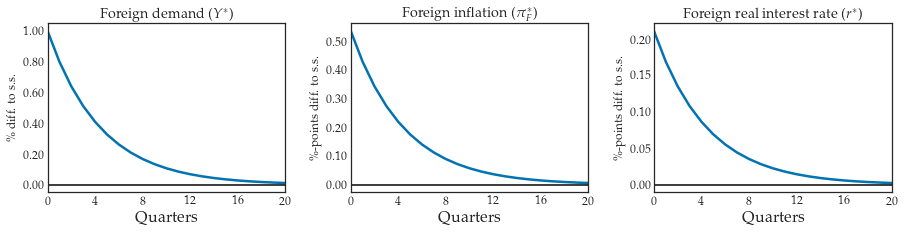

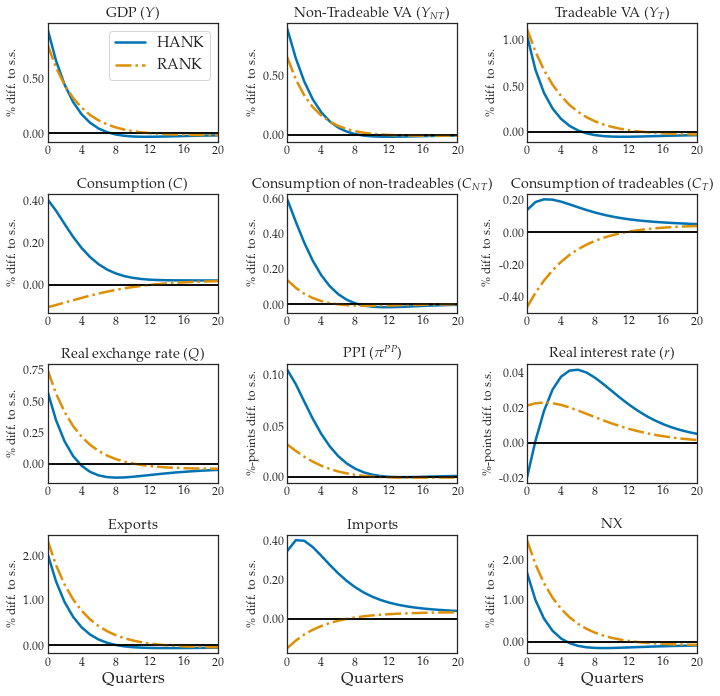

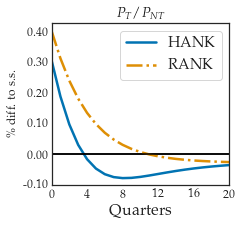

In [5]:
T_max = 21

paths = ['C_s','piF_s','rF_s']
pathlabels = ['Foreign demand ($Y^*$)', 'Foreign inflation ($\pi^*_F$)', 'Foreign real interest rate ($r^*$)']
pctp = ['rF_s', 'piF_s']
labels =  ['HANK', 'RANK']
ldash = ['-', '-.']
colors = ['C0','C1']
lwidth = 2.5 

fig = figs.show_IRFs_new(models=[models[HHs[0]]], paths=paths,labels=labels, pathlabels=pathlabels,
                    T_max=T_max, do_sumplot=False, scale=True, shocktitle=None, 
                    ldash=ldash, colors=colors, lwidth=lwidth, pctp=pctp, palette=None)    
fig.savefig(f'plots\ForeignDemand_shock.pdf')


paths = ['GDP','YNT','YT','C', 'CNT','CT', 'Q', 'ppi', 'r', 'Exports', 'Imports', 'NX']
pathlabels = ['GDP ($Y$)', 'Non-Tradeable VA ($Y_{NT}$)', 'Tradeable VA ($Y_{T}$)', 'Consumption ($C$)', 
              'Consumption of non-tradeables ($C_{NT}$)', 'Consumption of tradeables ($C_{T}$)',
              'Real exchange rate ($Q$)', 'PPI ($\pi^{PP}$)', 'Real interest rate ($r$)',
              'Exports', 'Imports', 'Net exports']
pctp = ['iF_s', 'r', 'piF', 'pi', 'piNT', 'piH', 'ppi', 'r', 'i']


fig = figs.show_IRFs_new(models=[models[x] for x in HHs], paths=paths,labels=labels, pathlabels=pathlabels,
                    T_max=T_max, do_sumplot=False, scale=True, shocktitle=None, maxrow=3,  
                    ldash=ldash, colors=colors, lwidth=lwidth, pctp=pctp, palette=None, figsize=[3.4, 2.5])   
if models[HHs[0]].par.floating == True:
    fig.savefig(f'plots\ForeignDemand_dom_responses_floating.pdf')
else:
    fig.savefig(f'plots\ForeignDemand_dom_responses_fixed.pdf')
    
    
# PNT/PH 
paths = ['PT']
ratio_plot = {'PT' : ['PT', 'PNT']}
pathlabels = ['$P_{T}/P_{NT}$']

fig = figs.show_IRFs_new(models=[models[x] for x in HHs], paths=paths,labels=labels, pathlabels=pathlabels,
                    T_max=T_max, do_sumplot=False, scale=True, shocktitle=None, maxrow=3, ratio_plot=ratio_plot, 
                    ldash=ldash, colors=colors, lwidth=lwidth, pctp=pctp, palette=None, figsize=[3.7, 3.5])   
if models[HHs[0]].par.floating == True:
    fig.savefig(f'plots\PT_PNT.pdf')

### Decomposition of HANK and RANK responses

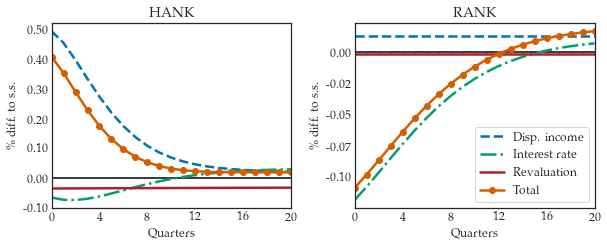

In [5]:
# Decomposed HANK responses 
fig = figs.C_decomp_HA_v_RA([models[x] for x in HHs], T_max=T_max, lwidth=2.5, testplot=False, disp_income=True)
fig.savefig(f'plots\HANK_RANK_decomp.pdf')

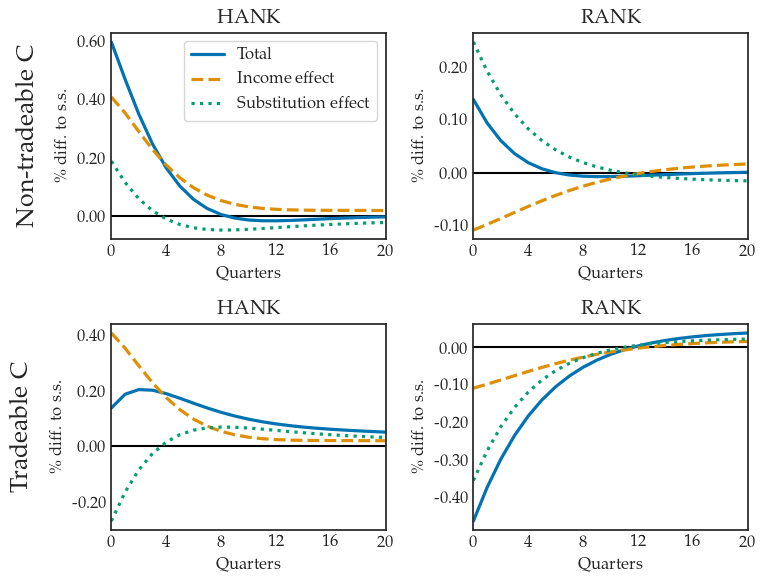

In [6]:
# CT, CNT decomposition 
fig = figs.trad_nontrad_decomp(models, HHs=['HA', 'RA-IM'], T_max=21)
fig.savefig(f'plots\HANK_RANK_decomp_CT_CNT.pdf')

## Fixed exchange rate 

In [7]:
HHs = ['HA','RA-IM']

model_foreign = GetForeignEcon.get_foreign_econ(shocksize=-0.001)
models = sol_helpers.sol_models({'floating' : False}, model_foreign=model_foreign)

HA
RA-IM
Finished!


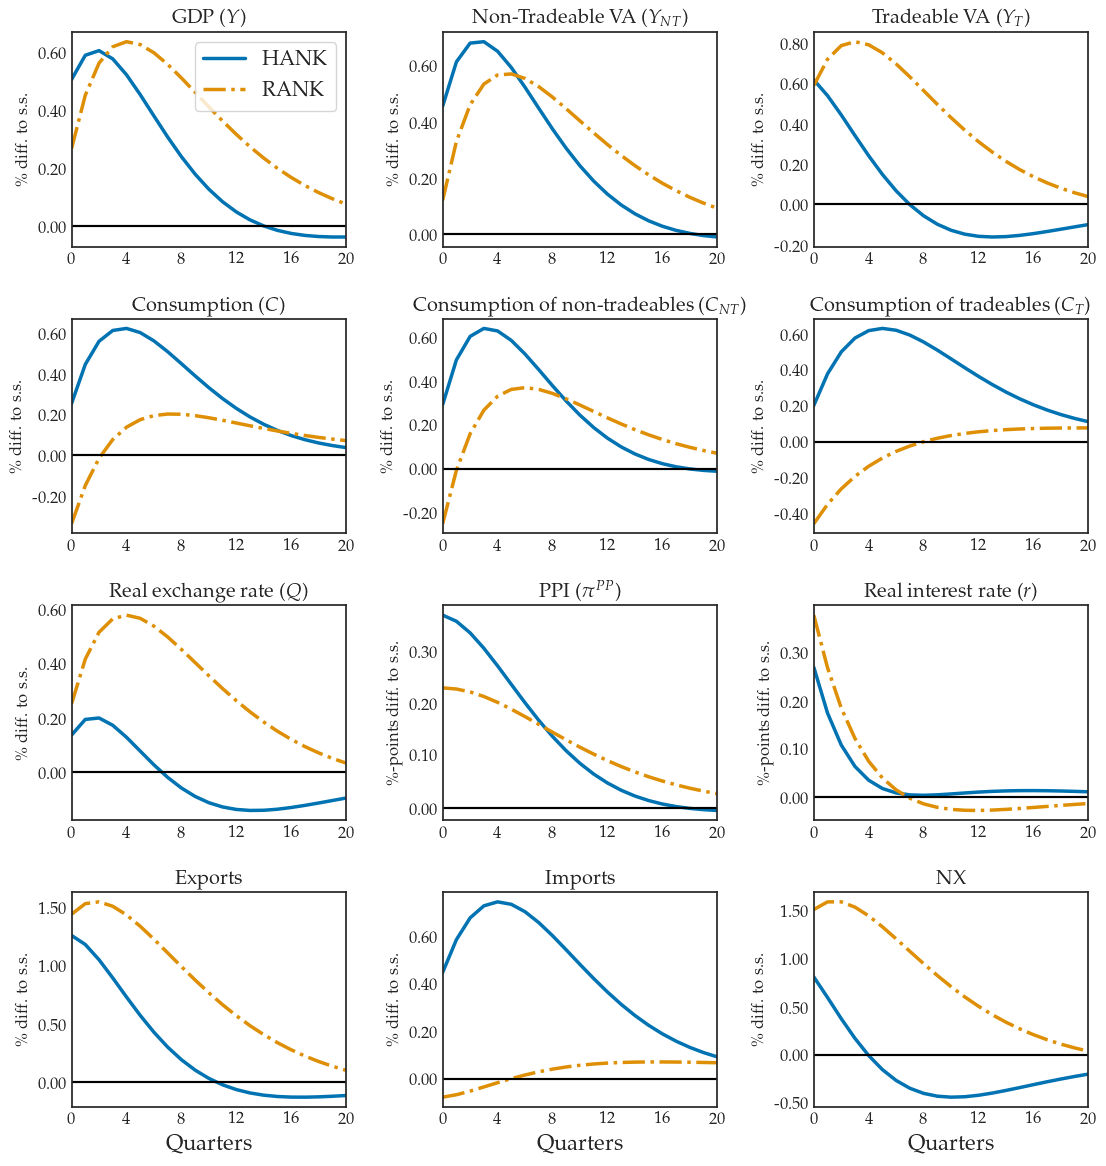

In [8]:
paths = ['GDP','YNT','YT','C', 'CNT','CT', 'Q', 'ppi', 'r', 'Exports', 'Imports', 'NX']
pathlabels = ['GDP ($Y$)', 'Non-Tradeable VA ($Y_{NT}$)', 'Tradeable VA ($Y_{T}$)', 'Consumption ($C$)', 
              'Consumption of non-tradeables ($C_{NT}$)', 'Consumption of tradeables ($C_{T}$)',
              'Real exchange rate ($Q$)', 'PPI ($\pi^{PP}$)', 'Real interest rate ($r$)',
              'Exports', 'Imports', 'Net exports']
pctp = ['iF_s', 'r', 'piF', 'pi', 'piNT', 'piH', 'ppi', 'r', 'i']


fig = figs.show_IRFs_new(models=[models[x] for x in HHs], paths=paths,labels=labels, pathlabels=pathlabels,
                    T_max=T_max, do_sumplot=False, scale=True, shocktitle=None, maxrow=3,  
                    ldash=ldash, colors=colors, lwidth=2.5, pctp=pctp, palette=None, figsize=[3.8, 3])   
if models[HHs[0]].par.floating == True:
    fig.savefig(f'plots\ForeignDemand_dom_responses_floating.pdf')
else:
    fig.savefig(f'plots\ForeignDemand_dom_responses_fixed.pdf')

## Robustness

### No IO

In [9]:
HHs = ['HA','RA-IM']

upars_foreign = {}
model_foreign = GetForeignEcon.get_foreign_econ(shocksize=-0.001, upars=upars_foreign)

upars = {'floating' : True, 'X_expshare' : np.array([0.0, 0.0])}
models = sol_helpers.sol_models(upars=upars, model_foreign=model_foreign)

HA
RA-IM
Finished!


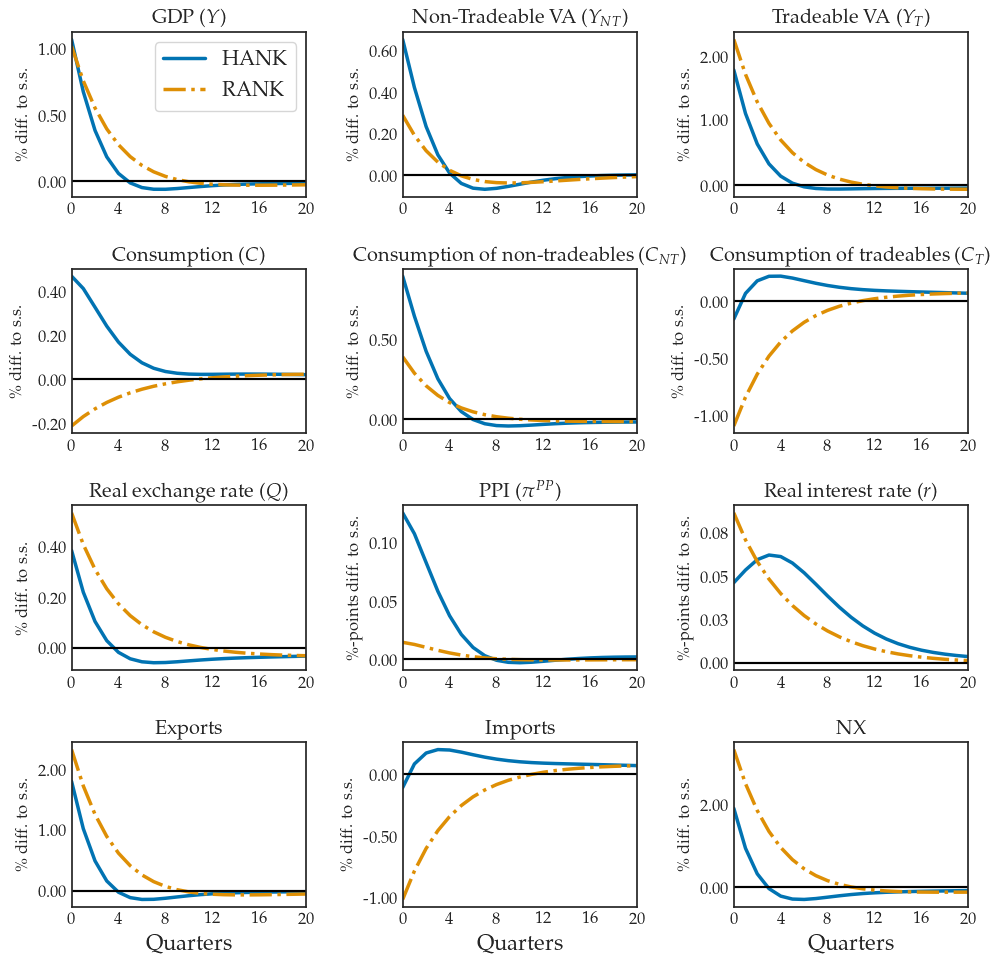

In [10]:
T_max = 21

labels =  ['HANK', 'RANK']
ldash = ['-', '-.']
colors = ['C0','C1']
lwidth = 2.5 

paths = ['GDP','YNT','YT','C', 'CNT','CT', 'Q', 'ppi', 'r', 'Exports', 'Imports', 'NX']
pathlabels = ['GDP ($Y$)', 'Non-Tradeable VA ($Y_{NT}$)', 'Tradeable VA ($Y_{T}$)', 'Consumption ($C$)', 
              'Consumption of non-tradeables ($C_{NT}$)', 'Consumption of tradeables ($C_{T}$)',
              'Real exchange rate ($Q$)', 'PPI ($\pi^{PP}$)', 'Real interest rate ($r$)',
              'Exports', 'Imports', 'Net exports']
pctp = ['iF_s', 'r', 'piF', 'pi', 'piNT', 'piH', 'ppi', 'r', 'i']


fig = figs.show_IRFs_new(models=[models[x] for x in HHs], paths=paths,labels=labels, pathlabels=pathlabels,
                    T_max=T_max, do_sumplot=False, scale=True, shocktitle=None, maxrow=3,  
                    ldash=ldash, colors=colors, lwidth=lwidth, pctp=pctp, palette=None, figsize=[3.4, 2.5])   

if models[HHs[0]].par.floating == True:
    fig.savefig(f'plots\ForeignDemand_dom_responses_no_IO_floating.pdf')
else:
    fig.savefig(f'plots\ForeignDemand_dom_responses_no_IO_fixed.pdf')
    

### General robustness checks

In [5]:
def sol_models_sensitivity_local(upars_dict=[], upars_HH=None, HHs=['HA'], scalevar='C_s', cumeffect=False, size=0.01, do_reduction=False):
    models = {}
    for par in upars_dict:
        models[par] = {}
    compiled = False
    
    for i,HH in enumerate(HHs):  
        print(HH)       
        for calib in upars_dict: 
            print(calib)
            #models[par][HH] = {}
            if compiled:
                pass
            else:
                model_ = HANKModelClass(name=HH)
                orgpar = deepcopy(model_.par)
            model_.par = deepcopy(orgpar)
            
            model_.par.HH_type = HH
            for param in upars_dict[calib]:
                setattr(model_.par,param,upars_dict[calib][param])
            if upars_HH is not None:
                for param in upars_HH[HH]:
                    setattr(model_.par,param,upars_HH[HH][param])

            model_.find_ss()
            if model_.par.HH_type == 'HA':
                model_.compute_jacs(do_print=False,skip_shocks=True)
            else:
                model_.compute_jacs(do_print=False,skip_shocks=True,skip_hh=True)
            GetForeignEcon.create_foreign_shock(model_, model_foreign)
            model_.transition_path(do_print=False)
            utils.scaleshock(scalevar, model_, size=size, cumeffect=cumeffect)
            local_model = deepcopy(model_)
            del local_model.jac 
            del local_model.sim 
            del local_model.sol 
            del local_model.jac_hh
            if do_reduction:
                for var in local_model.varlist:
                    curr = getattr(local_model.path,var)
                    setattr(local_model.path,var,curr[0,:])
            models[calib][HH] = local_model
            compiled = True
    del model_
    print(f'Finished!')
    return models

In [6]:
HHs = ['HA','RA-IM']
labels =  ['HANK', 'RANK']
T_max = 21
upars_foreign = {}
model_foreign = GetForeignEcon.get_foreign_econ(shocksize=-0.001, upars=upars_foreign)
do_reduction = True


pars = { 'baseline' : {'gamma' : 1.5},
        'low_gamma' : {'gamma' : 0.1}, 
        'low_eta' : {'eta' : 0.1},
        'high_gamma' : {'gamma' : 4.0}, 
        'high_eta' : {'eta' : 4.0}, 
        'low_etaT' : {'etaT' : 0.5}, 
        'CPI' : {'TaylorType' : 'CPI'}, 
        'taylorY' : {'TaylorType' : 'Y'}}

figdict = sol_models_sensitivity_local(pars, do_reduction=do_reduction, HHs=HHs)

HA
baseline
low_gamma
low_eta
high_gamma
high_eta
low_etaT
CPI
taylorY
RA-IM
baseline
low_gamma
low_eta
high_gamma
high_eta
low_etaT
CPI
taylorY
Finished!


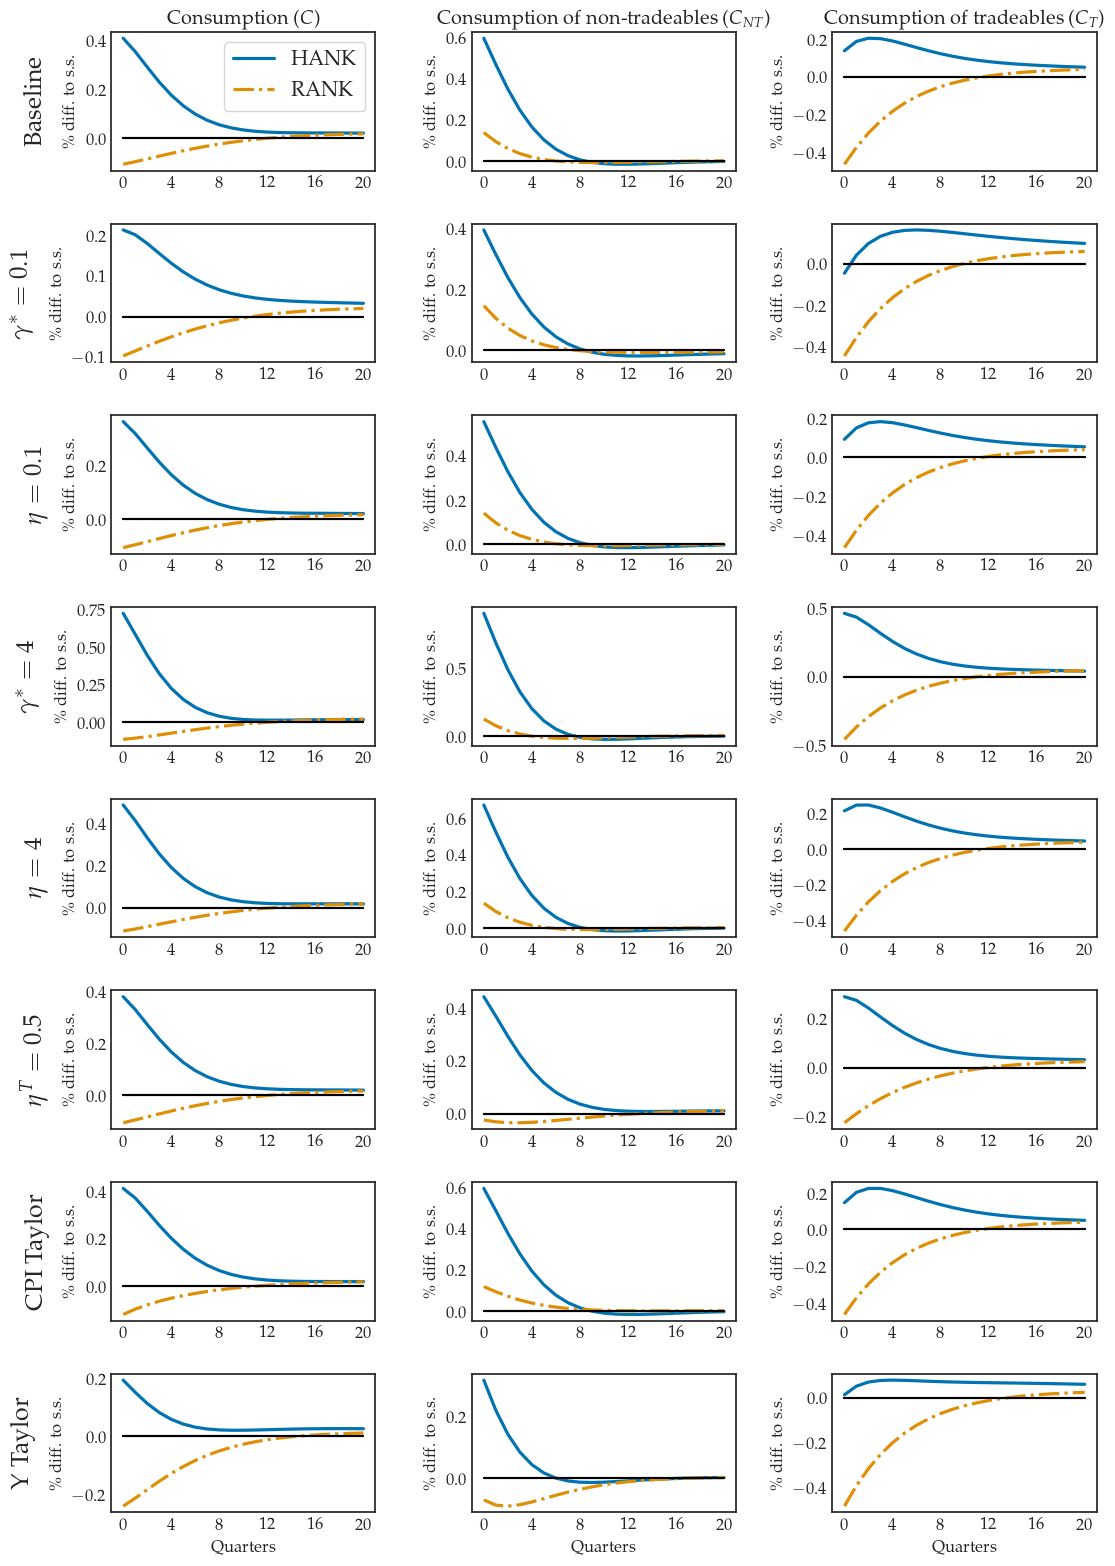

In [7]:
ldash = ['-', '-.']
colors = ['C0','C1']
lwidth = 2.5 
parname = 'gamma*'
parvals = [x for x in pars]
#parvalslabels = [f'$\gamma^* = 3$', f'$\eta = 3$', f'$\eta^T =0.5$', f'CPI Taylor', f'No IO']
#parvalslabels = [f'Baseline', f'$\gamma^* = 0.1$', f'$\eta = 0.1$', f'$\gamma^* = 4$', f'$\eta = 4$', f'$\eta^T =0.5$', f'CPI Taylor', f'No IO']
parvalslabels = [f'Baseline', f'$\gamma^* = 0.1$', f'$\eta = 0.1$', f'$\gamma^* = 4$', f'$\eta = 4$', f'$\eta^T =0.5$', f'CPI Taylor', f'Y Taylor']

paths = ['C','CNT', 'CT']
pathlabels = ['Consumption ($C$)', 'Consumption of non-tradeables ($C_{NT}$)', 'Consumption of tradeables ($C_{T}$)']

fig = figs.show_IRFs_new_robust_v2(models=figdict, parname=parname, parvals=parvals, paths=paths,labels=labels, pathlabels=pathlabels, parvalslabels=parvalslabels,
                    T_max=T_max, do_sumplot=False, scale=True, shocktitle=None, maxrow=4,  
                    ldash=ldash, colors=colors, lwidth=2.3,  palette=None, figsize=[3.8, 2], do_reduction=do_reduction)   
fig.savefig(f'plots\model_robustness.pdf')

# Correlated shocks 

In [16]:
HHs = ['HA','RA-IM']

model_foreign = GetForeignEcon.get_foreign_econ(shocksize=0.001)
regime = 'floating'
#regime = 'fixed'

if regime == 'fixed':
    upars = {'floating' : False}
else:
    upars = {'floating' : True}

models = sol_helpers.sol_models(upars, scalevar='C_s', cumeffect=True, size=0.0124, model_foreign=model_foreign)
models_org = deepcopy(models)

HA
RA-IM
Finished!


In [17]:
C_GDP_target = 0.92
Nq = 8 
beta_corrs = {}
beta_corrs_lin = {}
do_lin_only = False
use_same_deflator = False

def sol_lin():
    def obj_func(betacorr):
        res = (dC+betacorr*dC_dBeta)/(dGDP+betacorr*dGDP_dBeta) - C_GDP_target
        return res

    for i,HH in enumerate(HHs):
        model = models[HH]
        finjac = utils.get_GE_mat(model, totvarlist=['C', 'GDP', 'PGDP', 'P'], shocks_exo=['eps_beta'])
        dC = np.sum(model.path.C[0,:Nq]/model.ss.C - 1)
        dGDP = np.sum(model.path.GDP[0,:Nq]  /model.ss.GDP - 1)
        beta_s = model_foreign.path.betaF[0,:] - model_foreign.ss.betaF
        dC_dBeta =  np.sum((beta_s @ finjac[('C','eps_beta')]/model.ss.C)[:Nq])
        if use_same_deflator:
            GDP_new =  (model.ss.GDP + beta_s @ finjac[('GDP','eps_beta')]) * (model.ss.PGDP + beta_s @ finjac[('PGDP','eps_beta')]) / (model.ss.P + beta_s @ finjac[('P','eps_beta')])
            dGDP_dBeta = np.sum((GDP_new/model.ss.GDP-1)[:Nq])
        else:
            dGDP_dBeta = np.sum((beta_s @ finjac[('GDP','eps_beta')]/model.ss.GDP)[:Nq])
        results = utils.broyden_solver_autojac(obj_func, x0=np.array([0.1]), maxcount=150,  tol=1E-8, noisy=False)   
        beta_corrs_lin[HH] = float(results[0])
    return beta_corrs_lin

beta_corrs_lin = sol_lin()
if do_lin_only:
    beta_corrs = beta_corrs_lin
else:
    def obj_func(x):
        model.par.beta_corr = x[0] 
        GetForeignEcon.create_foreign_shock(model, model_foreign)
        model.transition_path(do_print=False)
        if use_same_deflator:
            GDP_new = model.path.GDP[0,:Nq] * model.path.PGDP[0,:Nq] / model.path.P[0,:Nq]
        else:
            GDP_new = model.path.GDP[0,:Nq]
        res = np.sum(model.path.C[0,:Nq]/model.ss.C-1)/np.sum(GDP_new/model.ss.GDP-1) - C_GDP_target
        return np.array([res])    
    
    for i,HH in enumerate(HHs):
        model = models[HH]
        results = utils.broyden_solver_autojac(obj_func, x0=np.array([beta_corrs_lin[HH]]), maxcount=10,  tol=1E-8)   
        beta_corrs[HH] = float(results[0])    
          
        
beta_RANK = beta_corrs['RA-IM']
print(f'Corr needed in RANK: {beta_RANK:4.2f}')
beta_HANK = beta_corrs['HA']
print(f'Corr needed in HANK: {beta_HANK:4.2f}')

On iteration 0
x = 0.171
y = -0.023


On iteration 1
x = 0.189
y = -0.000


On iteration 2
x = 0.190
y = -0.000


On iteration 3
x = 0.190
y = -0.000


On iteration 0
x = 0.853
y = -0.033


On iteration 1
x = 0.893
y = -0.001


On iteration 2
x = 0.894
y = -0.000


On iteration 3
x = 0.894
y = -0.000


Corr needed in RANK: 0.89
Corr needed in HANK: 0.19


In [20]:
HHs = ['HA','RA-IM']
model_foreign = GetForeignEcon.get_foreign_econ(shocksize=0.001)
upars_HH = {'HA' : {'beta_corr' : beta_corrs['HA']}, 'RA-IM' : {'beta_corr' : beta_corrs['RA-IM']}}
models_corr = sol_helpers.sol_models(upars=upars, upars_HH=upars_HH, scalevar='C_s', cumeffect=True, size=0.0124, model_foreign=model_foreign)

HA
RA-IM
Finished!


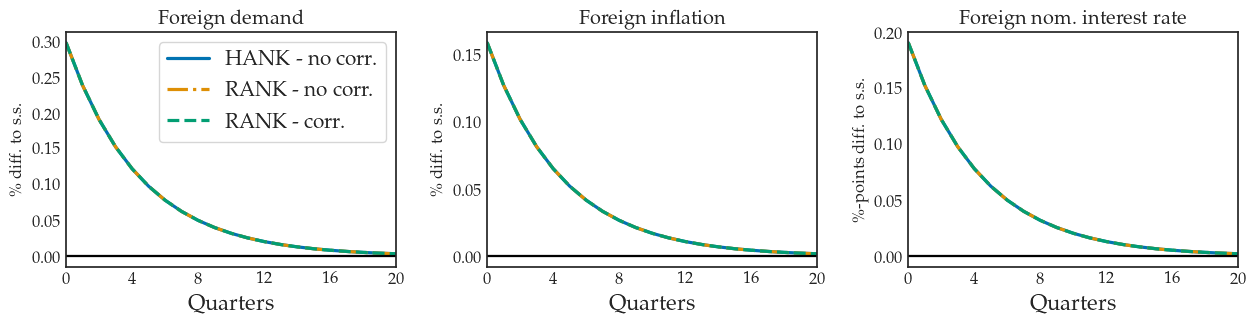

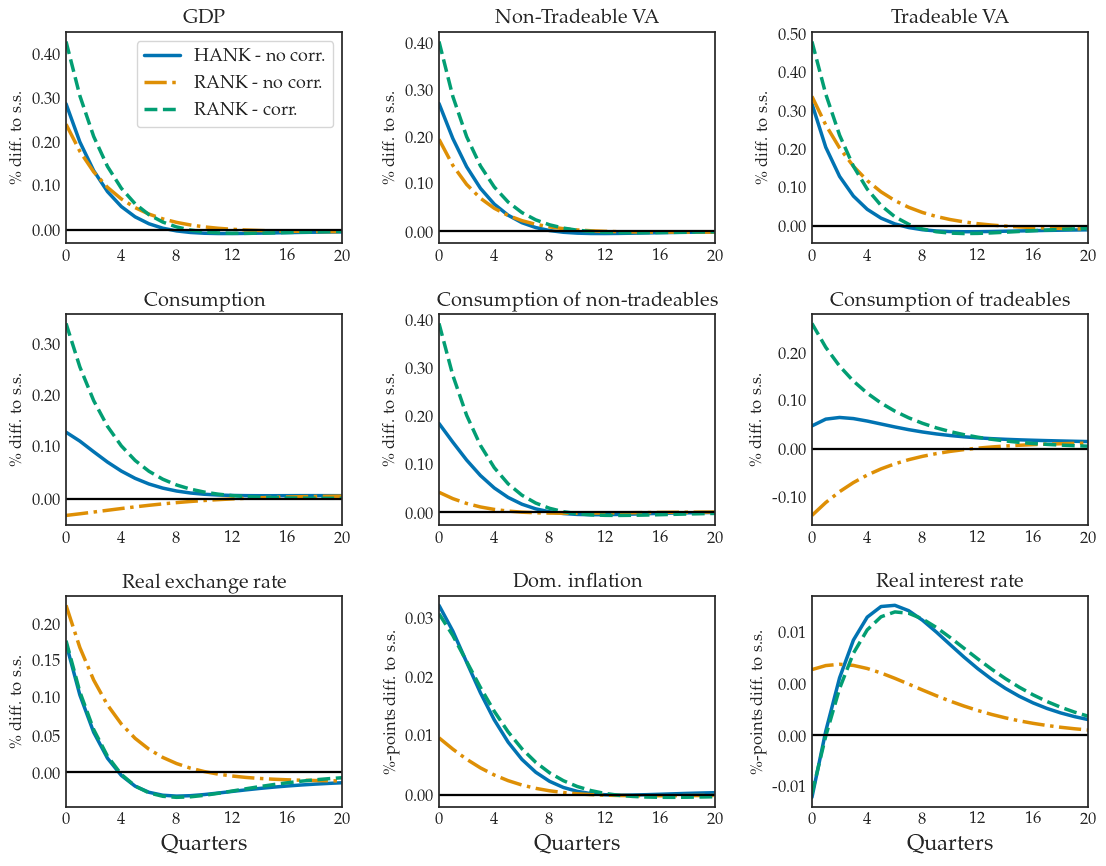

In [21]:
T_max = 21

#for x in HHs:
#    utils.scaleshock('C_s', models[x])
#models_ = [models[x] for x in HHs]


paths = ['C_s','piF_s','iF_s']
pathlabels = ['Foreign demand', 'Foreign inflation', 'Foreign nom. interest rate']
pctp = ['iF_s']
labels =  ['HANK - no corr.', 'RANK - no corr.', 'RANK - corr.']
ldash = ['-', '-.', '--']
colors = ['C0','C1', 'C2']
fig = figs.show_IRFs_new(models=[models_org['HA'], models_org['RA-IM'], models_corr['RA-IM']], paths=paths,labels=labels, pathlabels=pathlabels,
                    T_max=T_max, do_sumplot=False, scale=True, shocktitle=None, 
                    ldash=ldash, colors=colors, lwidth=2.3, pctp=pctp, palette=None)    

paths = ['GDP','VA_NT','VA_T','C', 'CNT','CT', 'Q', 'ppi', 'r']
pathlabels = ['GDP', 'Non-Tradeable VA', 'Tradeable VA', 'Consumption', 
              'Consumption of non-tradeables', 'Consumption of tradeables',
              'Real exchange rate', 'Dom. inflation', 'Real interest rate']
pctp = ['iF_s', 'r', 'piF', 'pi', 'piNT', 'piH', 'ppi', 'r', 'i']


fig = figs.show_IRFs_new(models=[models_org['HA'], models_org['RA-IM'], models_corr['RA-IM']], paths=paths,labels=labels, pathlabels=pathlabels,
                    T_max=T_max, do_sumplot=False, scale=True, shocktitle=None, maxrow=3,  
                    ldash=ldash, colors=colors, lwidth=2.5, pctp=pctp, palette=None, figsize=[3.8, 3], lfsize=13) 

#if models[HHs[0]].par.floating == True:
#    fig.savefig(f'plots\corr_shock_floating.pdf')
#else:
#    fig.savefig(f'plots\corr_shock_fixed.pdf')

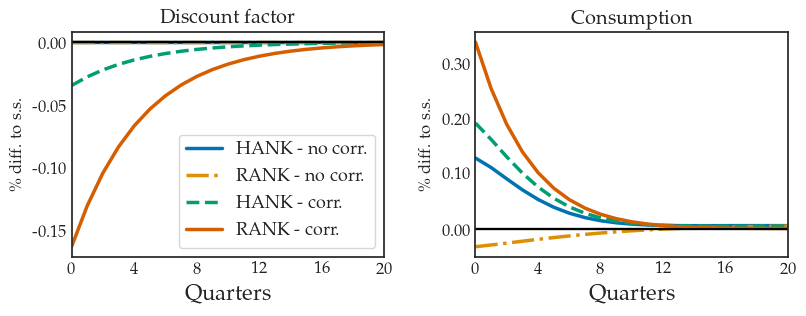

In [22]:
paths = ['eps_beta','C']
pathlabels = ['Discount factor', 'Consumption']
labels =  ['HANK - no corr.', 'RANK - no corr.', 'HANK - corr.', 'RANK - corr.']
ldash = ['-', '-.', '--', '-']
colors = ['C0','C1', 'C2', 'C3']


fig = figs.show_IRFs_new(models=[models_org['HA'], models_org['RA-IM'], models_corr['HA'], models_corr['RA-IM']], paths=paths,labels=labels, pathlabels=pathlabels,
                    T_max=T_max, do_sumplot=False, scale=True, shocktitle=None, maxrow=3,  
                    ldash=ldash, colors=colors, lwidth=2.5, pctp=pctp, palette=None, figsize=[4.2, 3.5], lfsize=13) 

if models[HHs[0]].par.floating == True:
    fig.savefig(f'plots\corr_shock_floating_short.pdf')
else:
    fig.savefig(f'plots\corr_shock_fixed.pdf')

In [23]:
# Correlations at lambda = 0 
HA_C_GDP_ratio = np.sum(models_org['HA'].path.C[0,:Nq]/models_org['HA'].ss.C-1)/np.sum(models_org['HA'].path.GDP[0,:Nq]/models_org['HA'].ss.GDP-1)
RA_C_GDP_ratio = np.sum(models_org['RA-IM'].path.C[0,:Nq]/models_org['RA-IM'].ss.C-1)/np.sum(models_org['RA-IM'].path.GDP[0,:Nq]/models_org['RA-IM'].ss.GDP-1)
print(f'HA C/GDP ratio with lambda = 0: {HA_C_GDP_ratio}')
print(f'RA C/GDP ratio with lambda = 0: {RA_C_GDP_ratio}')

HA C/GDP ratio with lambda = 0: 0.6735109544736246
RA C/GDP ratio with lambda = 0: -0.2042250123711839


# Decomposing the Real income channel 

In [11]:
model_foreign = GetForeignEcon.get_foreign_econ(shocksize=-0.001, upars=upars_foreign)

models_decomp = {} 
for regime in ['floating', 'fixed']:
    if regime == 'fixed':
        upars = {'floating' : False}
    else:
        upars = {'floating' : True}
    temp = sol_helpers.sol_models(upars=upars, model_foreign=model_foreign, HHs=['HA'])
    models_decomp[regime] = deepcopy(temp['HA'])

HA
RA-IM
Finished!
HA
RA-IM
Finished!


In [73]:
def decomp_income(models_decomp, regime):
    #regime = 'floating'
    model_ = models_decomp[regime]
    ss, path, par = model_.ss, model_.path, model_.par

    output = {}
    output['T'] = {}
    output['NT'] = {}

    output['T']['ss_inc'] = ss.wnT * par.sT 
    output['NT']['ss_inc'] =  ss.wnNT * (1-par.sT) 

    output['T']['real_inc']  =  (path.wnT[0,:] * par.sT - ss.wnT * par.sT) / output['T']['ss_inc'] * 100
    output['NT']['real_inc'] =  (path.wnNT[0,:] * (1-par.sT) - ss.wnNT * (1-par.sT)) / output['NT']['ss_inc'] * 100

    # mc part of real income
    output['T']['real_inc_mc']  = ((1-par.prodalpha[0]) * ss.PH / ss.P * ss.YT * path.mcT[0,:] - output['T']['ss_inc']) / output['T']['ss_inc'] * 100
    output['NT']['real_inc_mc'] = ((1-par.prodalpha[1]) * ss.PNT / ss.P * ss.YNT * path.mcNT[0,:] - output['NT']['ss_inc']) / output['NT']['ss_inc'] * 100

    # relative price part of real income 
    output['T']['real_inc_prices']  = ((1-par.prodalpha[0]) * ss.YT * ss.mcT * path.PH[0,:] / path.P[0,:] - output['T']['ss_inc']) / output['T']['ss_inc'] * 100
    output['NT']['real_inc_prices']  = ((1-par.prodalpha[1]) * ss.YNT * ss.mcNT * path.PNT[0,:] / path.P[0,:] - output['NT']['ss_inc']) / output['NT']['ss_inc'] * 100

    # demand scale part of real income 
    output['T']['real_inc_scale']   = ((1-par.prodalpha[0]) * ss.mcT * ss.PH / ss.P * path.YT[0,:] - output['T']['ss_inc']) / output['T']['ss_inc'] * 100
    output['NT']['real_inc_scale']  = ((1-par.prodalpha[1]) * ss.mcNT * ss.PNT / ss.P * path.YNT[0,:] - output['NT']['ss_inc']) / output['NT']['ss_inc'] * 100
    
    return output

decomp_income_dict = {}
for regime in ['floating', 'fixed']:
    decomp_income_dict[regime] = decomp_income(models_decomp, regime)


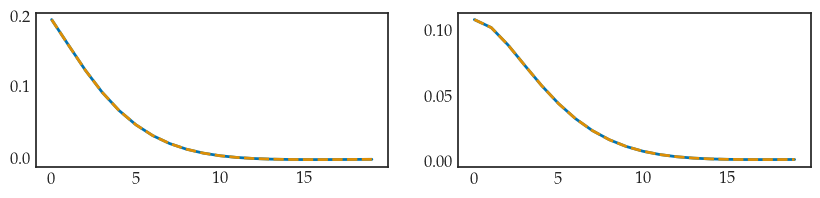

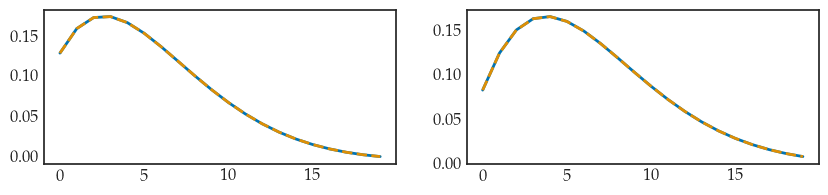

In [74]:
test_plot = True

if test_plot:
    for regime in ['floating', 'fixed']: 
        output = decomp_income_dict[regime]
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,2))

        tot = output['T']['real_inc'] 
        tot_test = output['T']['real_inc_mc'] + output['T']['real_inc_prices'] + output['T']['real_inc_scale']
        ax1.plot(tot[:20], linewidth=2)
        ax1.plot(tot_test[:20], '--', linewidth=2)

        tot = output['NT']['real_inc']
        tot_test = output['NT']['real_inc_mc'] + output['NT']['real_inc_prices'] + output['NT']['real_inc_scale']
        ax2.plot(tot[:20], linewidth=2)
        ax2.plot(tot_test[:20], '--', linewidth=2)

        plt.show()

### floating ###


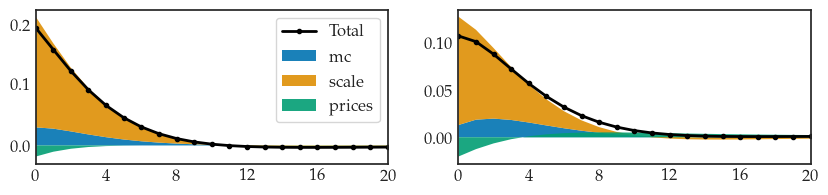

### fixed ###


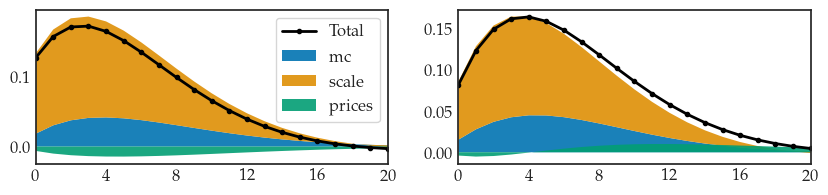

In [76]:
T_max = 21

for regime in ['floating', 'fixed']: 
    print(f'### {regime} ###')
    output = decomp_income_dict[regime]
    colors_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,2))

    ax1.plot(output['T']['real_inc'][:T_max], linewidth=2, color='black', marker='.')
    ax1.stackplot(np.arange(T_max), [output['T']['real_inc_mc'][:T_max],output['T']['real_inc_scale'][:T_max]], colors=[colors_cycle[0], colors_cycle[1]], alpha=0.9) # , colors=['#377EB8','#55BA87','#7E1137']
    ax1.stackplot(np.arange(T_max), [output['T']['real_inc_prices'][:T_max]],alpha=0.9, colors=[colors_cycle[2]]) # , colors=['#377EB8','#55BA87','#7E1137']
    ax1.legend(['Total','mc', 'scale','prices'], frameon=True)
    ax1.set_xlim([0, T_max-1])
    ax1.set_xticks(np.arange(0, T_max, 4))

    ax2.plot(output['NT']['real_inc'][:T_max], linewidth=2, color='black', marker='.')
    #plt.stackplot(np.arange(T_max), [output['T']['real_inc_mc'][:T_max], output['T']['real_inc_prices'][:T_max], output['T']['real_inc_scale'][:T_max]], colors=['blue','maroon','orange'], alpha=1., baseline='wiggle') # , colors=['#377EB8','#55BA87','#7E1137']
    ax2.stackplot(np.arange(T_max), [output['NT']['real_inc_mc'][:T_max],output['NT']['real_inc_scale'][:T_max]], colors=[colors_cycle[0], colors_cycle[1]], alpha=0.9) # , colors=['#377EB8','#55BA87','#7E1137']
    ax2.stackplot(np.arange(T_max), [output['NT']['real_inc_prices'][:T_max]],alpha=0.9, colors=[colors_cycle[2]]) # , colors=['#377EB8','#55BA87','#7E1137']
    ax2.set_xlim([0, T_max-1])
    ax2.set_xticks(np.arange(0, T_max, 4))
    plt.show()

